# Pair programming 1. session

### TASK

- detect objects of a given img using _detect_object
- extract features of each object and classify them
- print results on the image
- visualize the results in a pdf report

In [108]:
from dataclasses import dataclass, astuple

import numpy as np


@dataclass
class PrecipitateFeatures:
    axis_a:float
    axis_b:float
    center_x:float
    center_y: float

@dataclass
class PrecipitateObject:
    local_mask:object
    top:int
    left:int

def _detect_objects(img) -> list[PrecipitateObject]:
    
    n_objects = np.random.randint(100,high = 200)
    t_l = np.random.uniform(0,1024, size = (n_objects,2))
    mask_size = np.random.randint(3,high=20, size=(n_objects,))[:,np.newaxis]
    return  [ PrecipitateObject(top = y,left=x, local_mask=np.ones((int(size),int(size)))) for x,y,size in np.hstack([t_l,mask_size])]
    

def _extract_features(obj: PrecipitateObject) -> PrecipitateFeatures:
    return PrecipitateFeatures(
        axis_a = np.random.uniform(0,10),
        axis_b = np.random.uniform(0,10),
        center_x = np.random.uniform(0,1024),
        center_y = np.random.uniform(0,1024)
        )
    

def _classify_shape(features: PrecipitateFeatures) -> str:
    if features.axis_a/features.axis_b > 2:
        return "stoji"
    elif features.axis_a/features.axis_b < 0.5:
        return "lezi"
    else:
        return "kulaty"

#### Top-down approach: 
Pre-define the chunks of code according to tasks.
#### Additional assumptions:
- The output should be program- and platform-  independent (that is why the result is saved as .csv);
- The output should be final (if the output is changed another colleague should be able to take care of generating results without our input, thus the input of the plotting functions should be reiterated df).

#### Input
1 image with shape 1024*1024.

In [13]:
img = np.zeros((1024, 1024))

#### Task 1.
- detect objects of a given img using _detect_object


In [16]:
objects = _detect_objects(img)
print(len(objects))

140


#### Task 2. 
- extract features of each object and classify them

In [24]:
features = [_extract_features(obj) for obj in objects]
shapes = [_classify_shape(feature) for feature in features]

#### Task 3.
- print results on the image
- visualize the results in a pdf report (3 images: a) one image with ellipsis, b) 2 histograms: ratio of the axes of the ellipsis, barchart of the shapes)


In [131]:
def get_color_map():
    shape_names = ['stoji', 'lezi', 'kulaty']
    color_names = ['r', 'b', 'k']
    return dict(zip(shape_names, color_names))
    

In [132]:
color_map = get_color_map()
colors = [color_map[shape] for shape in shapes]

In [63]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse


In [126]:
feature_cols = ['axis_a', 'axis_b', 'center_x', 'center_y']

In [141]:
def get_ellipse(feature, color):
    return Ellipse(xy=(feature.center_x, feature.center_y), width=feature.axis_a, height=feature.axis_b, fill=False, color=color)

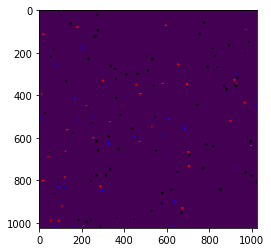

In [144]:
def plot_ellipses(ax, img, df):
    color_map = get_color_map()
    colors = [color_map[shape] for shape in df['shape'].to_list()]
    ellipsis = [get_ellipse(feature, color) for feature, color in zip(df.itertuples(), colors)]
    ax.imshow(img)
    for e in ellipsis:
        ax.add_patch(e)
ax = plt.subplot(111, aspect='equal')
plot_ellipses(ax, img, df)
plt.show()


In [148]:
def plot_ratios(ax, df):
    ratios = df.axis_a/df.axis_b
    ax.hist(ratios)

In [157]:
from collections import Counter
def plot_shapes(ax, df):
    counter = Counter(df['shape'].to_list())
    ind = counter.keys() # equals to list(set(words))
    height = counter.values() # counts the elements' frequency
    
    ax.bar(ind, height)

In [158]:
def plot_result_image(df, img):
    fig_w, fig_h = 8.27, 11.69
    fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(fig_w, fig_h))

    gs = axs[0,0].get_gridspec()
    for ax in axs[0:2, 0:2].ravel():
        ax.remove()
    axbig = fig.add_subplot(gs[0:2, 0:2])
    fig.tight_layout()

    plot_ellipses(axbig, img, df)
    plot_ratios(axs[2,0], df)
    plot_shapes(axs[2,1], df)
    return fig

C:\Users\jk\AppData\Local\Temp/ipykernel_7900/940426595.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


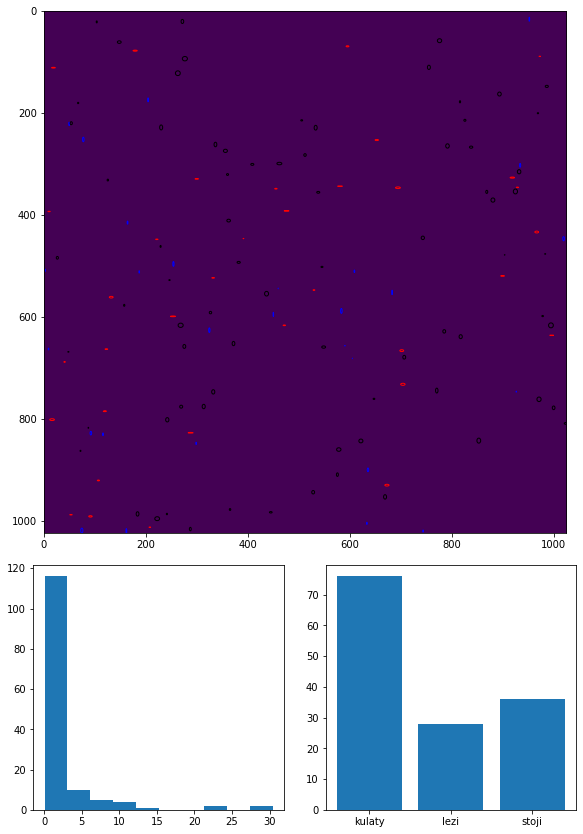

In [159]:
res = plot_result_image(df, img)
fig.show()

In [97]:
fig.savefig('precipitate_results.pdf', dpi=300)  

#### Task 4.
- save features into .csv

In [102]:
import pandas as pd
df = pd.DataFrame(features)
df['shape'] = shapes

In [114]:
import os
features_filename = "precipitates_features.csv"
features_dir = 'output'
os.makedirs(features_dir, exist_ok=True)
df.to_csv(os.path.join(features_dir, features_filename), index=False)